### Importing Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

### Building and Preparing DataFrame

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pserpaschiavo/svc-degradation-detection/refs/heads/main/python/datasets/unloaded-concorrencia-long.csv", low_memory=False)

df.head()

,time,sent,received,latency_min,latency_median,latency_75th,latency_95th,latency_99th
0,3.000,5003,5002,112,463,2074,7775,18691.0
1,4.000,4999,5001,122,308,1567,13582,29517.0
2,5.000,5005,5005,109,305,1121,6012,9508.0
3,6.000,5001,4996,119,633,1800,10002,18919.0
4,7.000,5005,5008,122,543,1352,8810,13233.0


In [ ]:
df.shape

(86398, 8)

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

df.shape

(57600, 8)

In [ ]:
df.latency_median = pd.to_numeric(df.latency_median, errors='coerce').fillna(0).astype(int)
df.received = pd.to_numeric(df.received, errors='coerce').fillna(0).astype(int)
df.sent = pd.to_numeric(df.sent, errors='coerce').fillna(0).astype(int)
df.time = pd.to_numeric(df.time, errors='coerce').fillna(0).astype(int)

df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57600 entries, 0 to 57599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            57600 non-null  int64  
 1   sent            57600 non-null  int64  
 2   received        57600 non-null  int64  
 3   latency_min     57600 non-null  object 
 4   latency_median  57600 non-null  int64  
 5   latency_75th    57597 non-null  object 
 6   latency_95th    57597 non-null  object 
 7   latency_99th    57595 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.5+ MB


In [ ]:
print(df.time.isna().sum())
print(df.latency_median.isna().sum())
print(np.isinf(df.time).sum())
print(np.isinf(df.latency_median).sum())

0
0
0
0


In [ ]:
df.columns

Index(['time', 'sent', 'received', 'latency_min', 'latency_median',
       'latency_75th', 'latency_95th', 'latency_99th'],
      dtype='object')

In [ ]:
df = df.drop(columns=['latency_min','latency_75th', 'latency_95th', 'latency_99th'])

df.time = df.time - 2

df.head()

,time,sent,received,latency_median
0,1,5003,5002,463
1,2,4999,5001,308
2,3,5005,5005,305
3,4,5001,4996,633
4,5,5005,5008,543


In [ ]:
df.columns = ['time', 'sent', 'received', 'latency']

df.head()

,time,sent,received,latency
0,1,5003,5002,463
1,2,4999,5001,308
2,3,5005,5005,305
3,4,5001,4996,633
4,5,5005,5008,543


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57600 entries, 0 to 57599
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   time      57600 non-null  int64
 1   sent      57600 non-null  int64
 2   received  57600 non-null  int64
 3   latency   57600 non-null  int64
dtypes: int64(4)
memory usage: 1.8 MB


In [ ]:
df.index

RangeIndex(start=0, stop=57600, step=1)

In [ ]:
latencia = df.latency
time = latencia.index

In [ ]:
latencia.head()

,latency
0,463
1,308
2,305
3,633
4,543


In [ ]:
time

RangeIndex(start=0, stop=57600, step=1)

In [ ]:
print(type(latencia))
print(type(time))

<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(21, 7))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

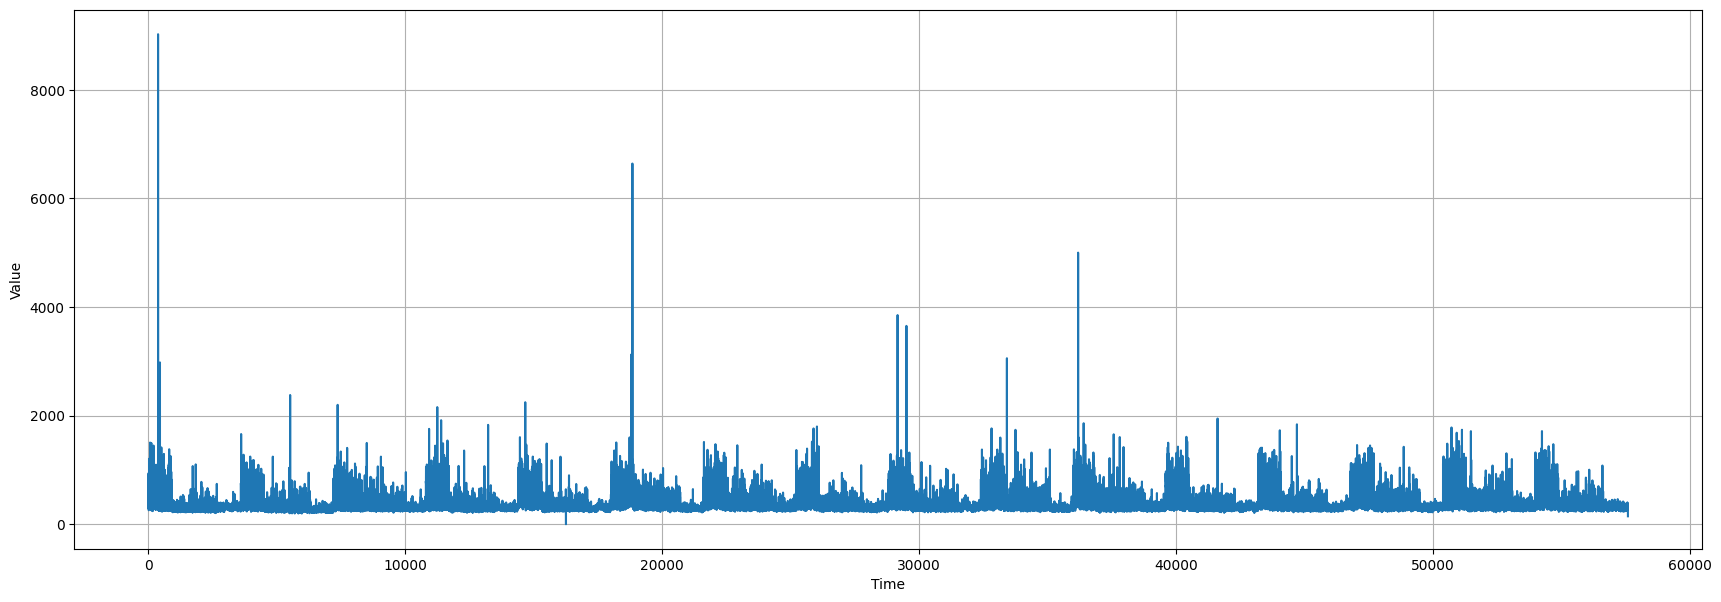

In [ ]:
plot_series(latencia.index, latencia)

### Spliting Time Series

In [ ]:
# Define the split time
test_hours = 4
split_time = (time.shape[0] - test_hours * 3600)
print(split_time)

# Get the train set
time_train = time[:split_time]
x_train = latencia[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = latencia[split_time:]

43200


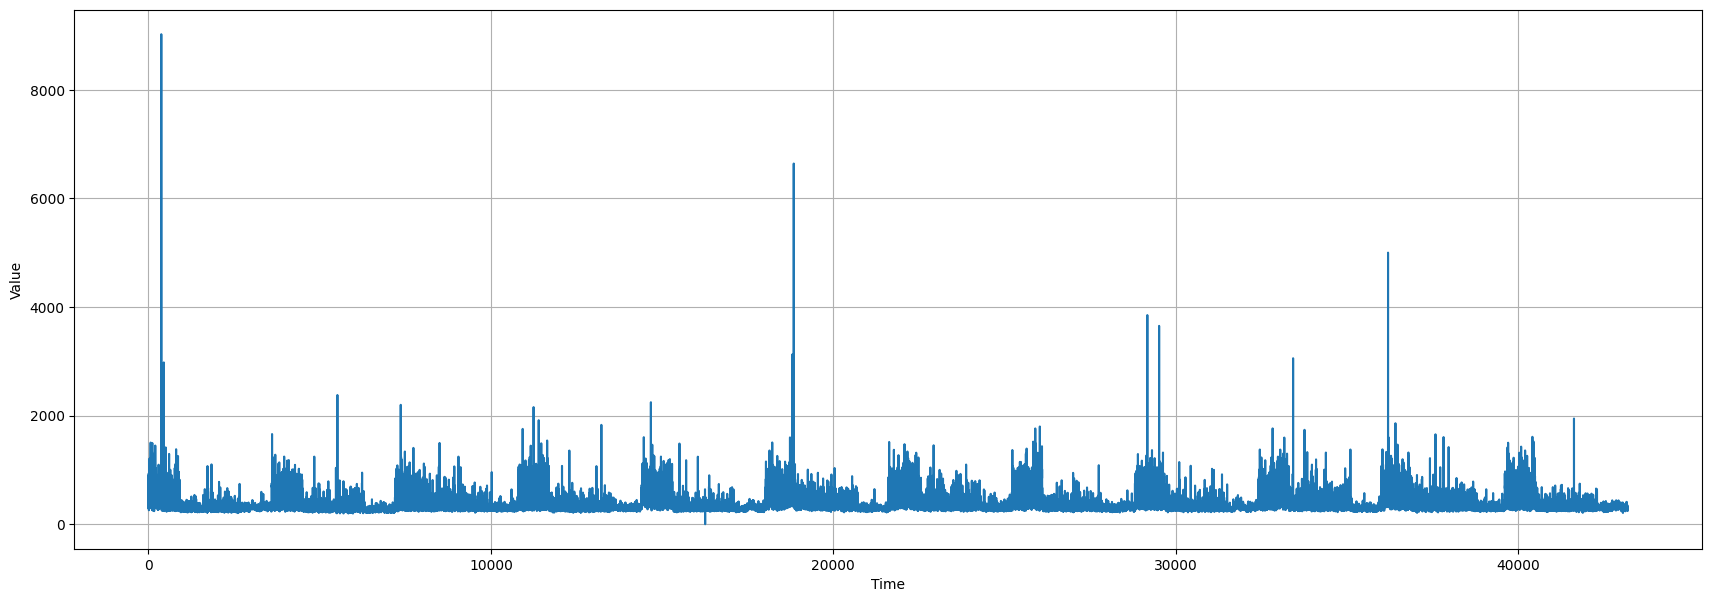

In [ ]:
plot_series(time_train, x_train)

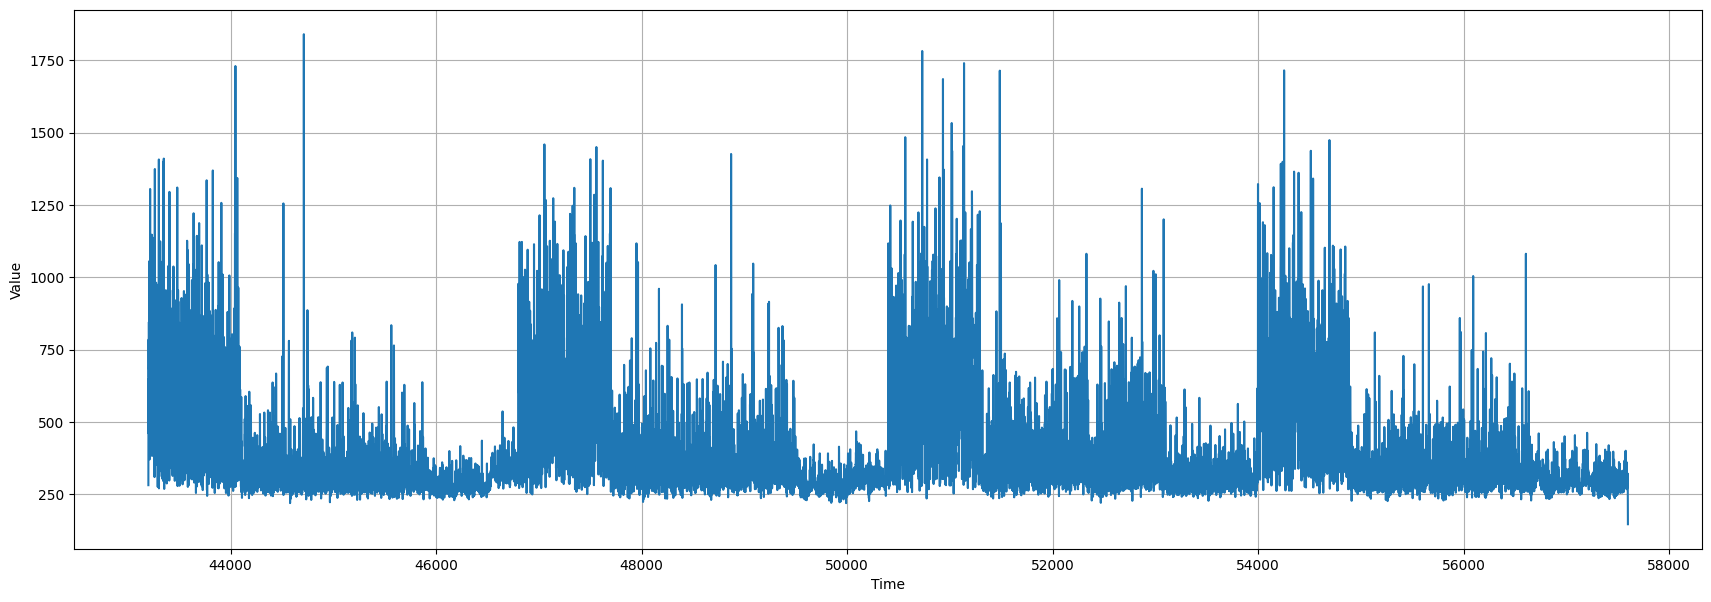

In [ ]:
plot_series(time_valid, x_valid)

## Statistical Approaches

### Naive Forecasting

In [ ]:
# Generate the naive forecast
naive_forecast = latencia[split_time - 1:-1]

# Define time step
time_step = 56000

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')

ground truth at time step 56000: 307
prediction at time step 56001: 328


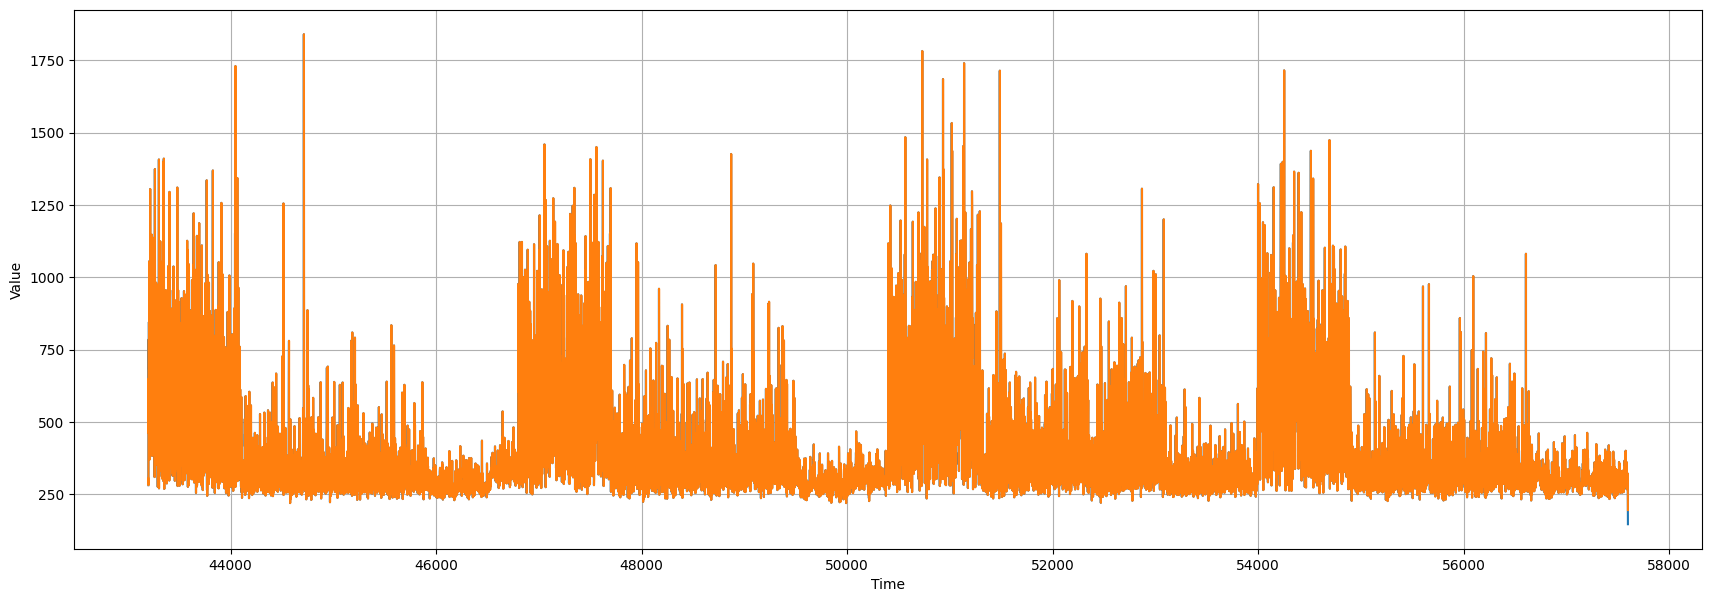

In [ ]:
plot_series(time_valid, (x_valid, naive_forecast))

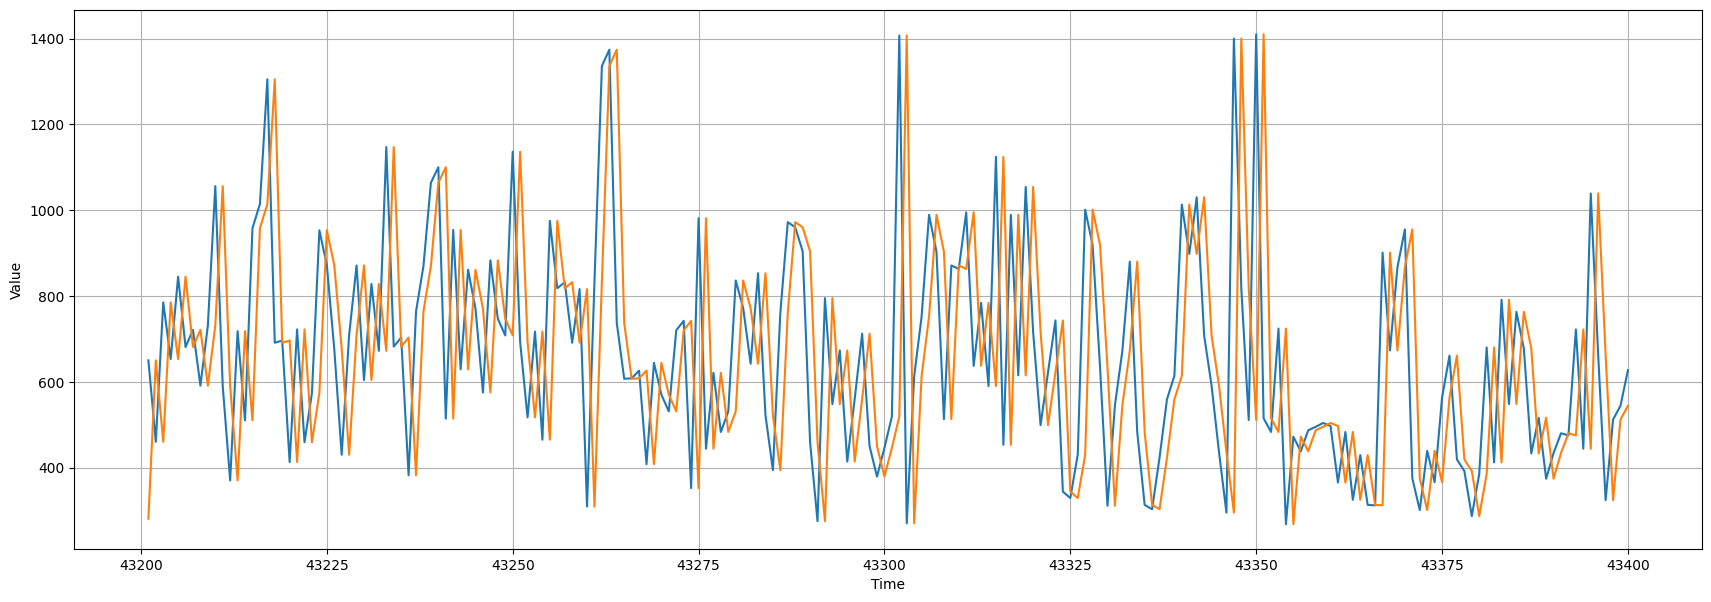

In [ ]:
plot_series(time_valid, (x_valid, naive_forecast), start=1, end=201)

In [ ]:
print(tf.keras.metrics.mse(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mae(x_valid, naive_forecast).numpy())

31293.857
106.79972


### Useful functions

In [ ]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []

    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())

    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

In [ ]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []

    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())

    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

### Window Size: 600 seconds (10 minutes)

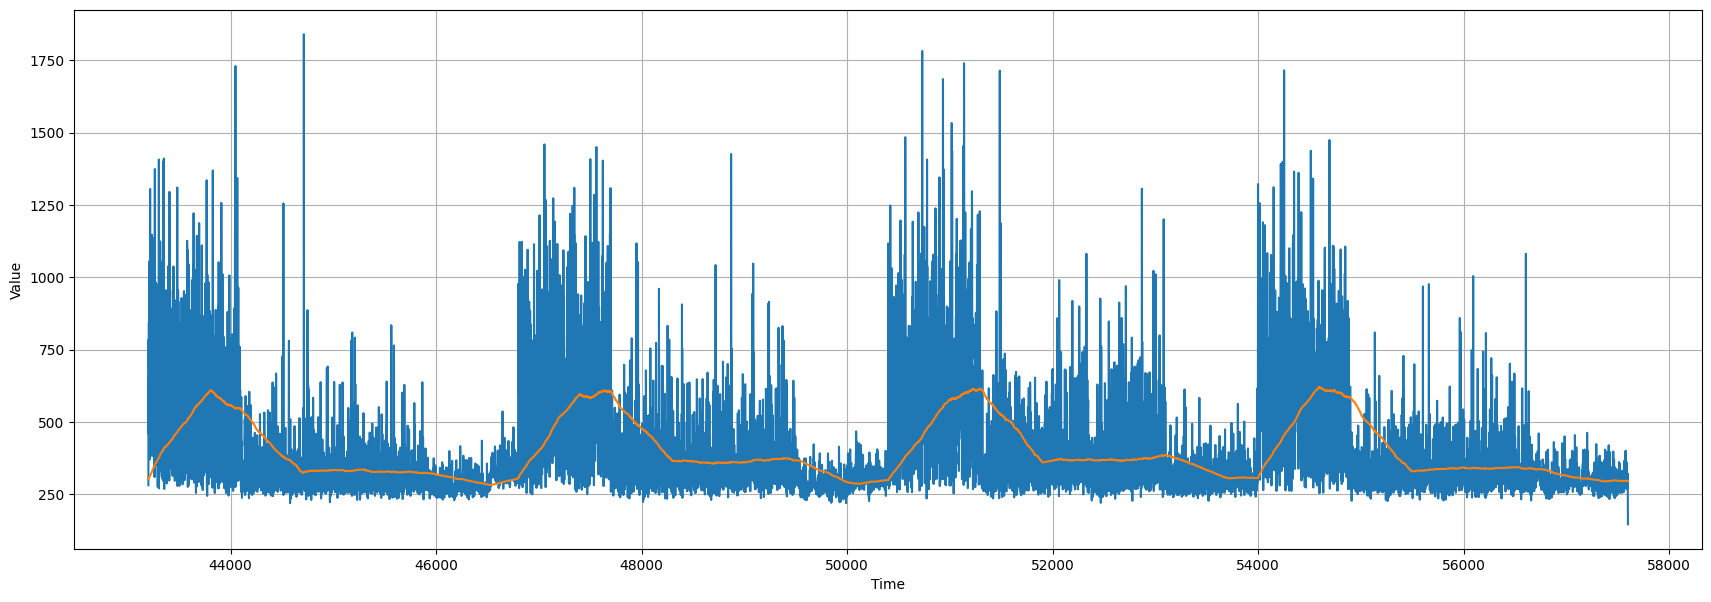

In [ ]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(latencia, 600)[split_time - 600:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mse(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mae(x_valid, moving_avg).numpy())

26350.849932284913
105.38414710648148


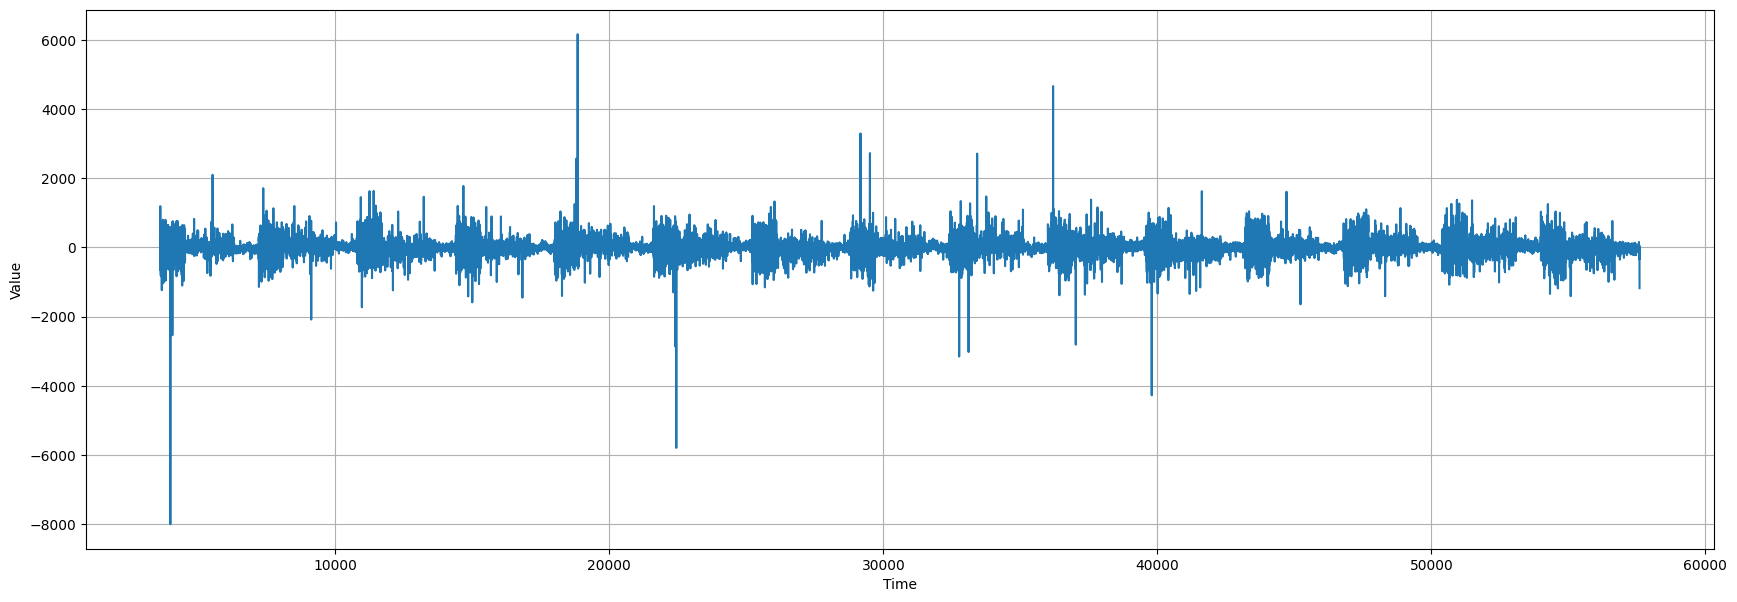

In [ ]:
# Subtract the values at t-365 from original series
diff_series = ((latencia[3600:].reset_index(drop=True) - latencia[:-3600]).reset_index(drop=True))
# Truncate the first 365 time steps
diff_time = time[3600:]

# Plot the results
plot_series(diff_time, diff_series)

Tamanho de diff_moving_avg antes do corte: 53400
Tamanho de diff_series após o corte: 14400
Tamanho de diff_moving_avg após o corte: 14400


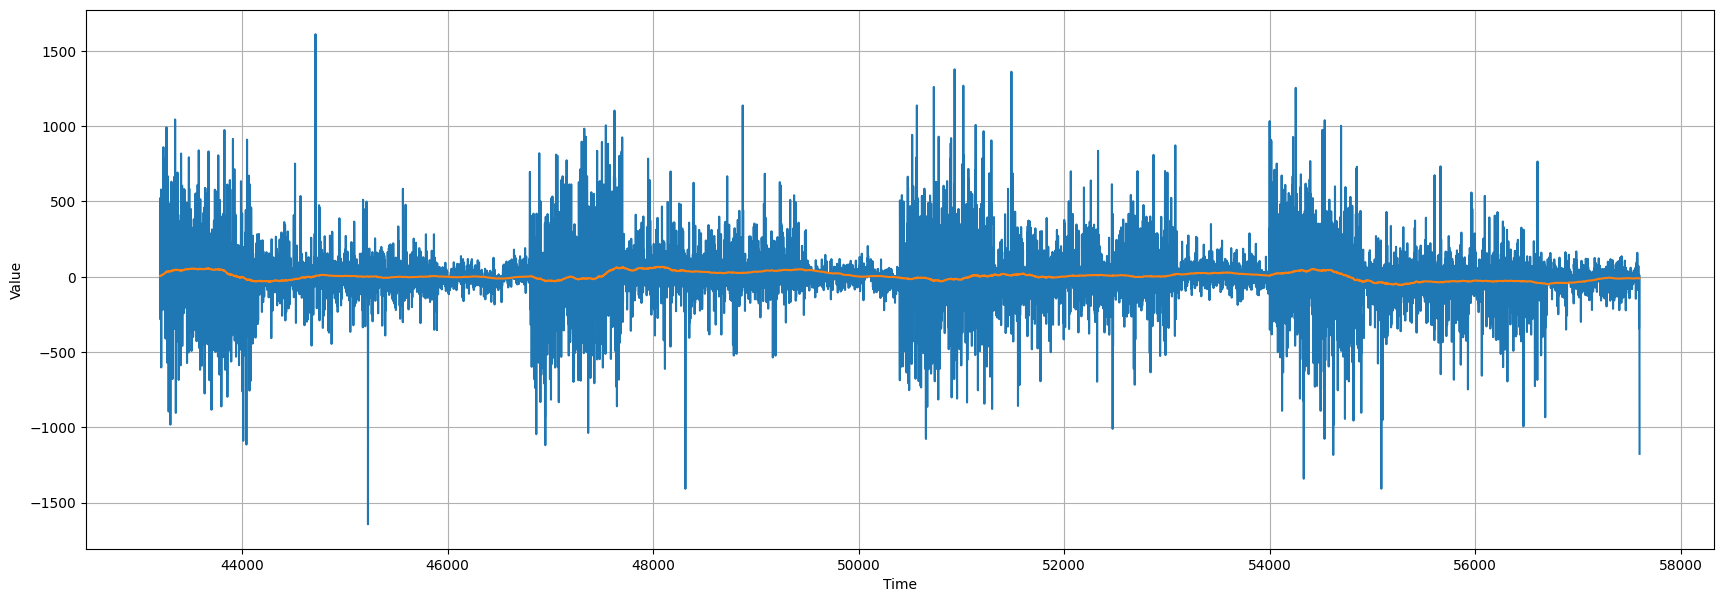

In [ ]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 600)

# Verifique o tamanho de diff_moving_avg antes do corte
print(f"Tamanho de diff_moving_avg antes do corte: {len(diff_moving_avg)}")

# Slice the prediction points that corresponds to the validation set time steps
# Verifique o tamanho de split_time e 14400 para garantir que o corte está correto
diff_moving_avg = diff_moving_avg[split_time - 3600 - 600:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - 3600:]

# Verifique os tamanhos das séries antes de plotar
print(f"Tamanho de diff_series após o corte: {len(diff_series)}")
print(f"Tamanho de diff_moving_avg após o corte: {len(diff_moving_avg)}")

# Plot the results, garantindo que os tamanhos sejam iguais
if len(diff_series) == len(diff_moving_avg):
    plot_series(time_valid, (diff_series, diff_moving_avg))
else:
    print("Erro: Tamanhos desalinhados entre as séries.")


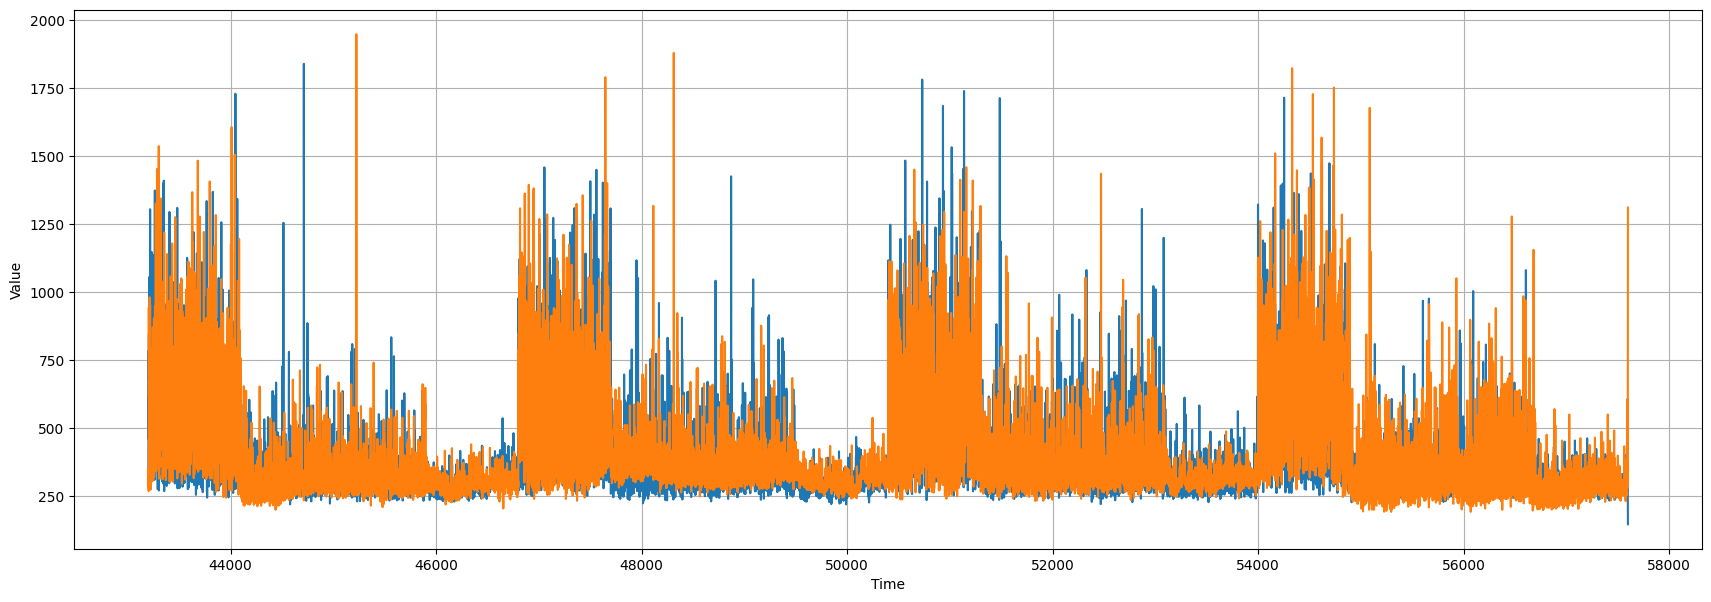

In [ ]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = latencia[split_time - 3600:-3600] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [ ]:
print(tf.keras.metrics.mse(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mae(x_valid, diff_moving_avg_plus_past).numpy())

36381.479689088155
118.43514988425926


Tamanho de smooth_past: 14400
Tamanho de diff_moving_avg: 14400


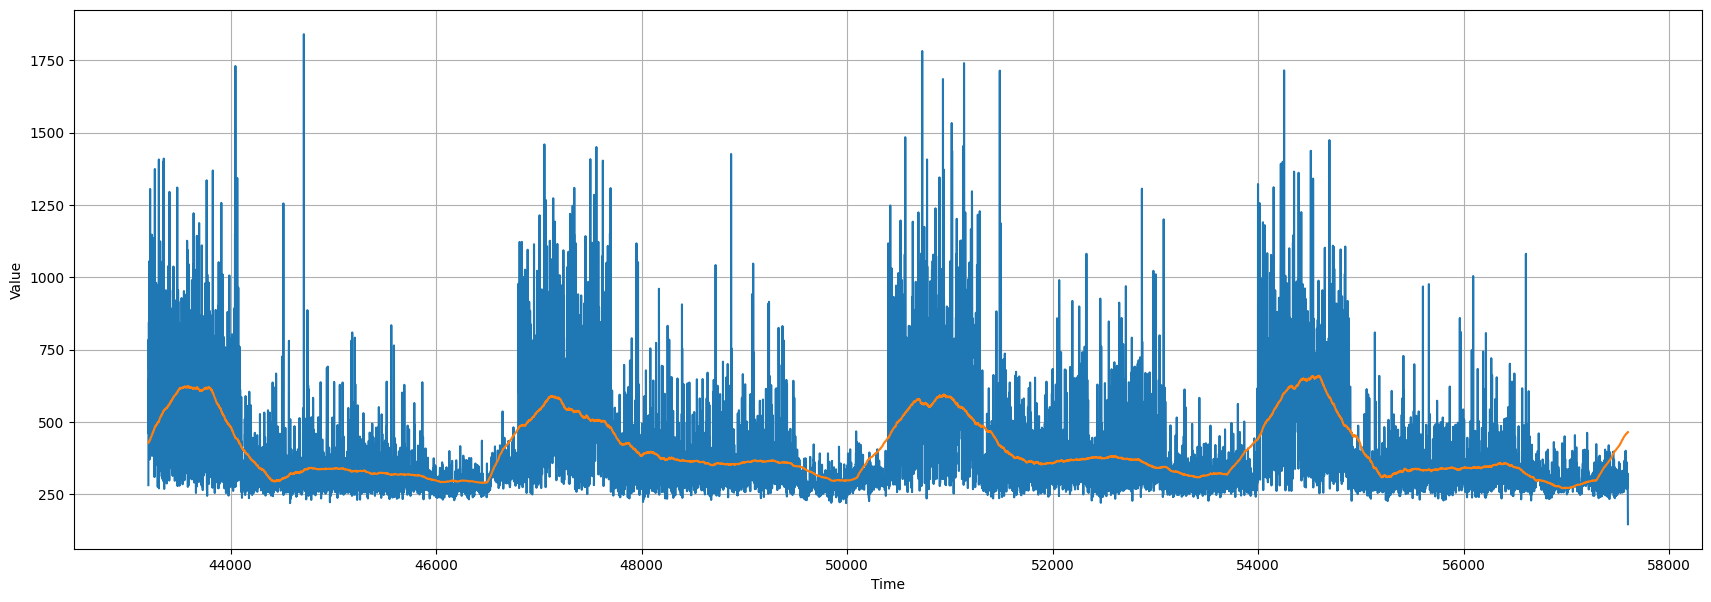

In [ ]:
# Gerar a média móvel suavizada da série original
smooth_past = moving_average_forecast(latencia[split_time - 3900:-3299], 601)

# Ajustar o tamanho de diff_moving_avg para corresponder ao de smooth_past
diff_moving_avg = diff_moving_avg[-len(smooth_past):]

# Agora somar as duas séries, pois agora têm o mesmo tamanho
diff_moving_avg_plus_smooth_past = smooth_past + diff_moving_avg

# Verifique o tamanho das séries antes de plotar
print(f"Tamanho de smooth_past: {len(smooth_past)}")
print(f"Tamanho de diff_moving_avg: {len(diff_moving_avg)}")

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))


In [ ]:
 # Compute the metrics
print(tf.keras.metrics.mse(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mae(x_valid, diff_moving_avg_plus_smooth_past).numpy())

20481.92494882229
92.37249215986473


### Windows size: 300 seconds (5 minutes)

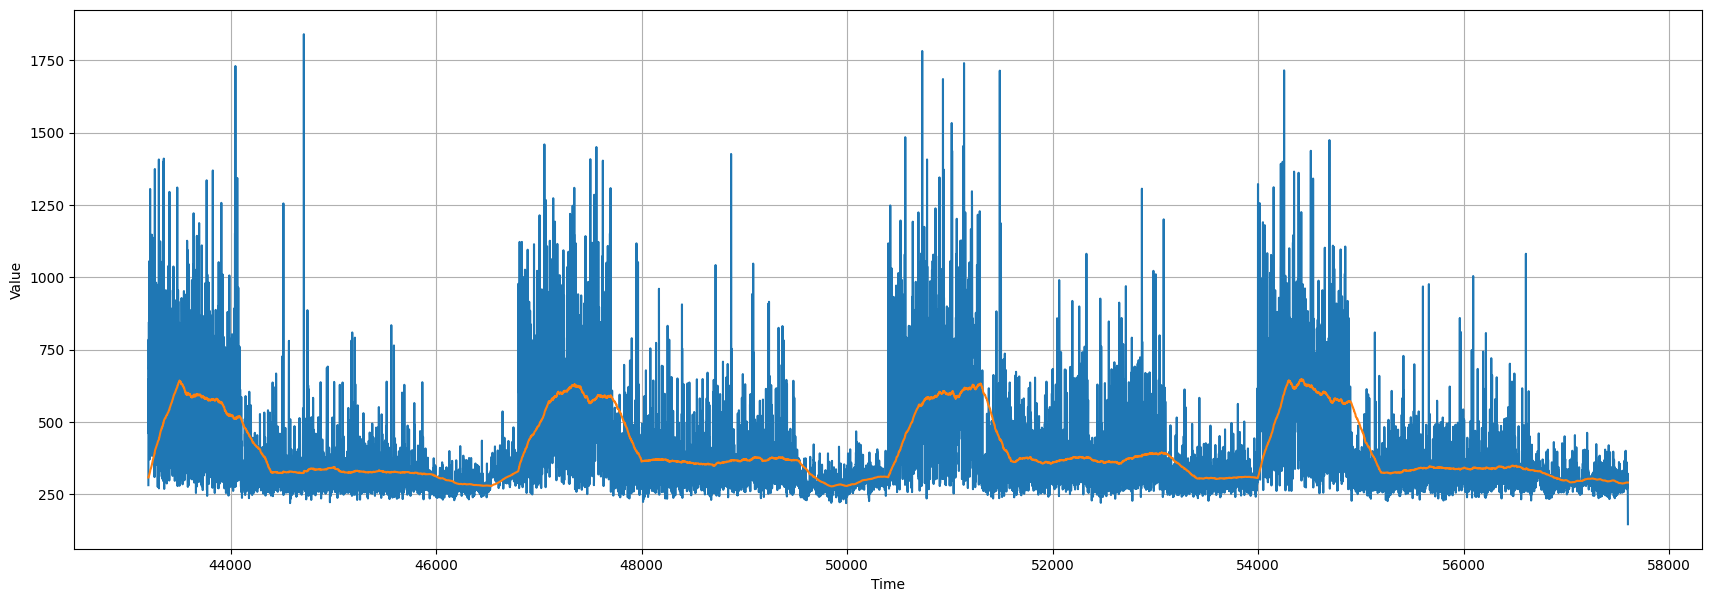

In [ ]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(latencia, 300)[split_time - 300:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mse(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mae(x_valid, moving_avg).numpy())

22178.74373214352
94.21905000000001


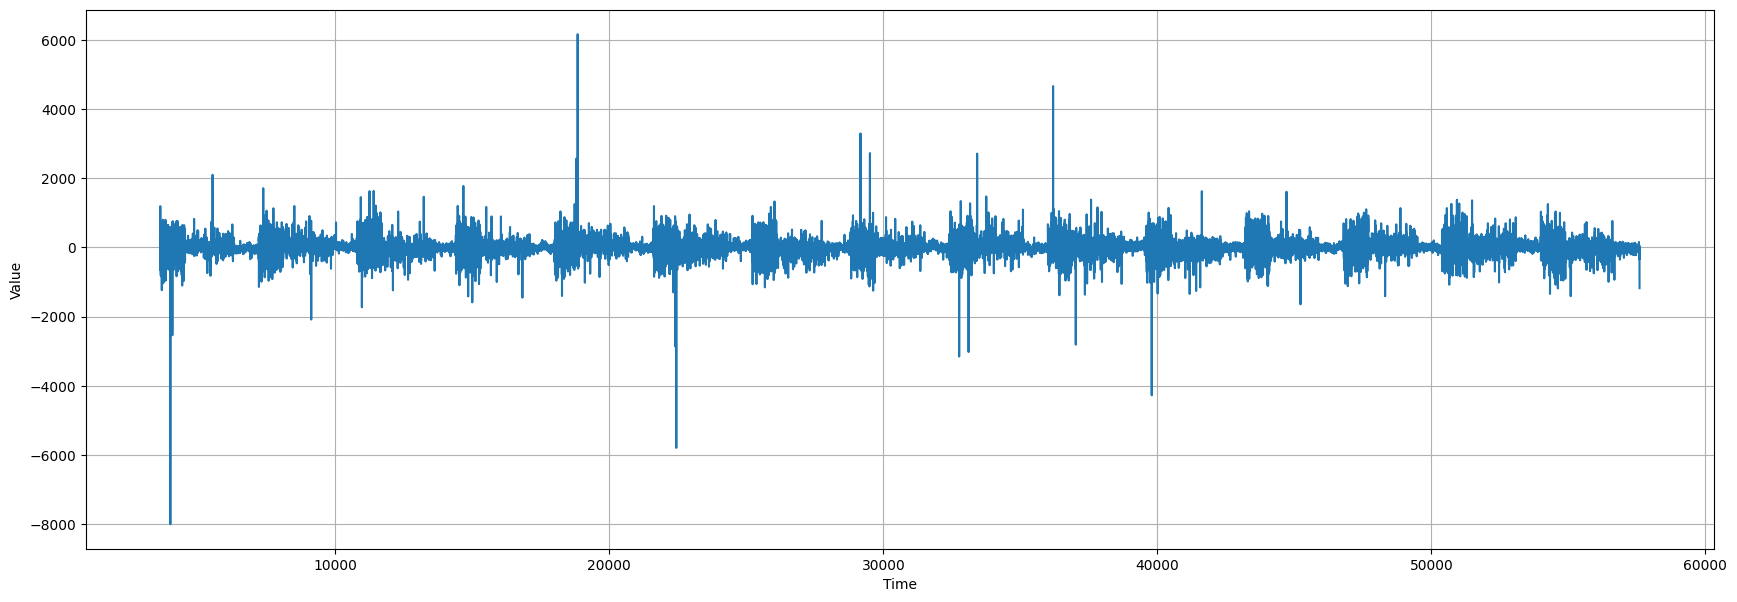

In [ ]:
# Subtract the values at t-365 from original series
diff_series = ((latencia[3600:].reset_index(drop=True) - latencia[:-3600]).reset_index(drop=True))
# Truncate the first 365 time steps
diff_time = time[3600:]

# Plot the results
plot_series(diff_time, diff_series)

Tamanho de diff_moving_avg antes do corte: 53700
Tamanho de diff_series após o corte: 14400
Tamanho de diff_moving_avg após o corte: 14400


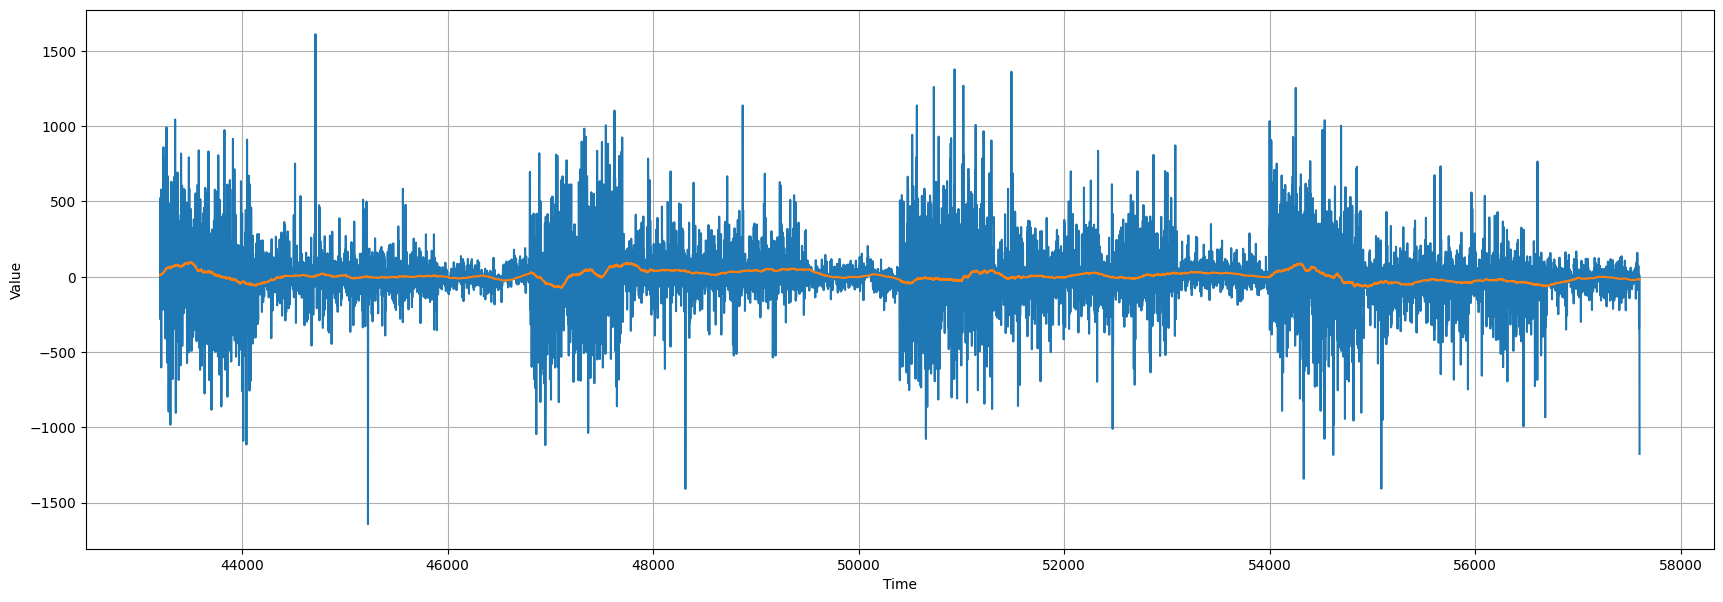

In [ ]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 300)

# Verifique o tamanho de diff_moving_avg antes do corte
print(f"Tamanho de diff_moving_avg antes do corte: {len(diff_moving_avg)}")

# Slice the prediction points that corresponds to the validation set time steps
# Verifique o tamanho de split_time e 14400 para garantir que o corte está correto
diff_moving_avg = diff_moving_avg[split_time - 3600 - 300:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - 3600:]

# Verifique os tamanhos das séries antes de plotar
print(f"Tamanho de diff_series após o corte: {len(diff_series)}")
print(f"Tamanho de diff_moving_avg após o corte: {len(diff_moving_avg)}")

# Plot the results, garantindo que os tamanhos sejam iguais
if len(diff_series) == len(diff_moving_avg):
    plot_series(time_valid, (diff_series, diff_moving_avg))
else:
    print("Erro: Tamanhos desalinhados entre as séries.")

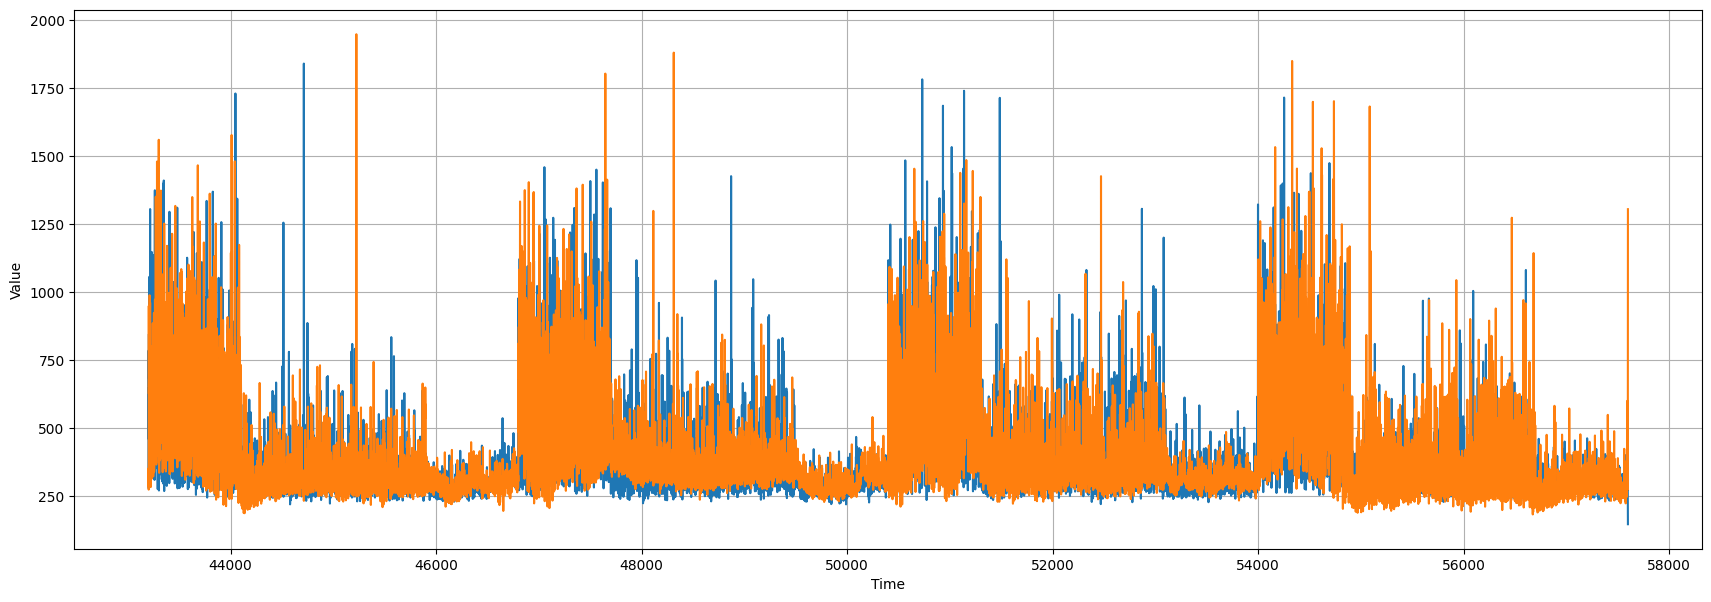

In [ ]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = latencia[split_time - 3600:-3600] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [ ]:
print(tf.keras.metrics.mse(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mae(x_valid, diff_moving_avg_plus_past).numpy())

36329.38605678936
118.39037800925927


Tamanho de smooth_past: 14400
Tamanho de diff_moving_avg: 14400


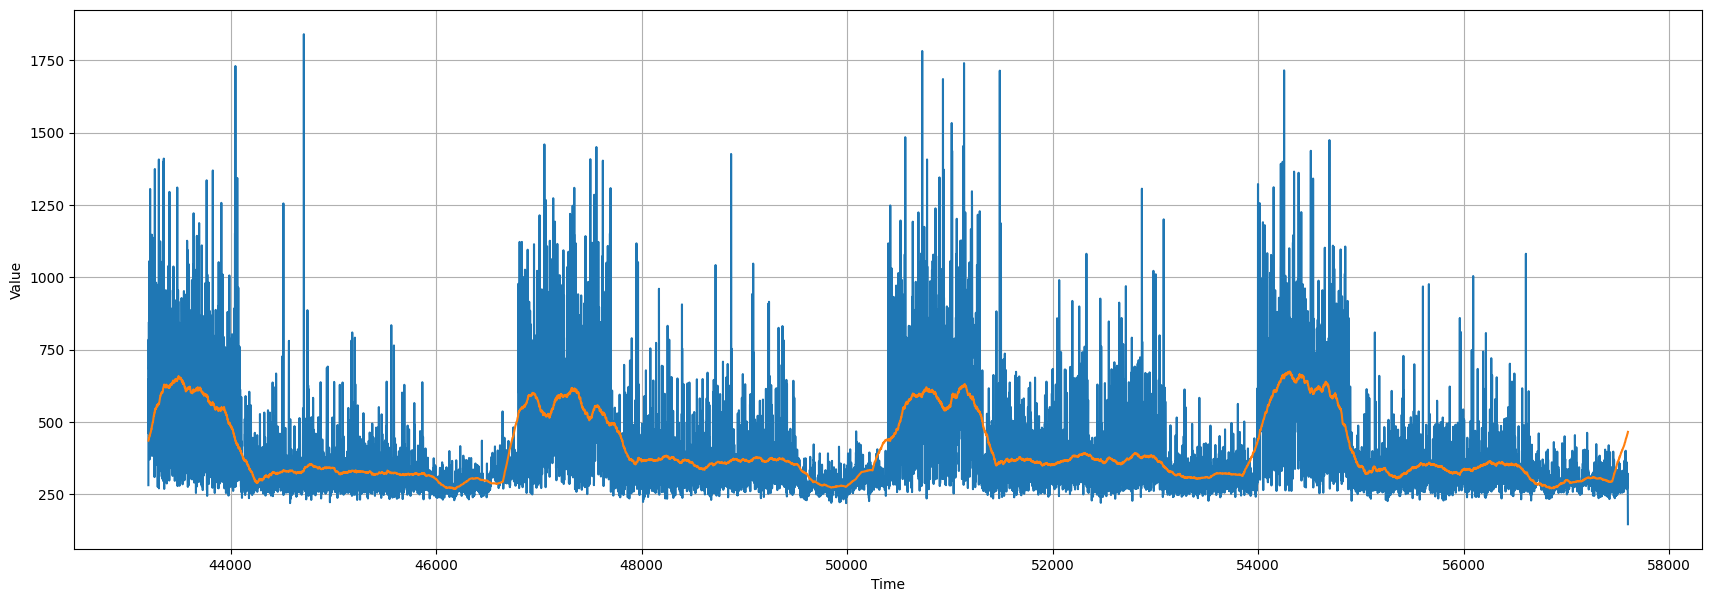

In [ ]:
# Gerar a média móvel suavizada da série original
smooth_past = moving_average_forecast(latencia[split_time - 3750:-3449], 301)

# Ajustar o tamanho de diff_moving_avg para corresponder ao de smooth_past
diff_moving_avg = diff_moving_avg[-len(smooth_past):]

# Agora somar as duas séries, pois agora têm o mesmo tamanho
diff_moving_avg_plus_smooth_past = smooth_past + diff_moving_avg

# Verifique o tamanho das séries antes de plotar
print(f"Tamanho de smooth_past: {len(smooth_past)}")
print(f"Tamanho de diff_moving_avg: {len(diff_moving_avg)}")

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

In [ ]:
 # Compute the metrics
print(tf.keras.metrics.mse(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mae(x_valid, diff_moving_avg_plus_smooth_past).numpy())

19550.472187593346
89.01003204057464


### Windows size: 120 seconds (2 minutes)

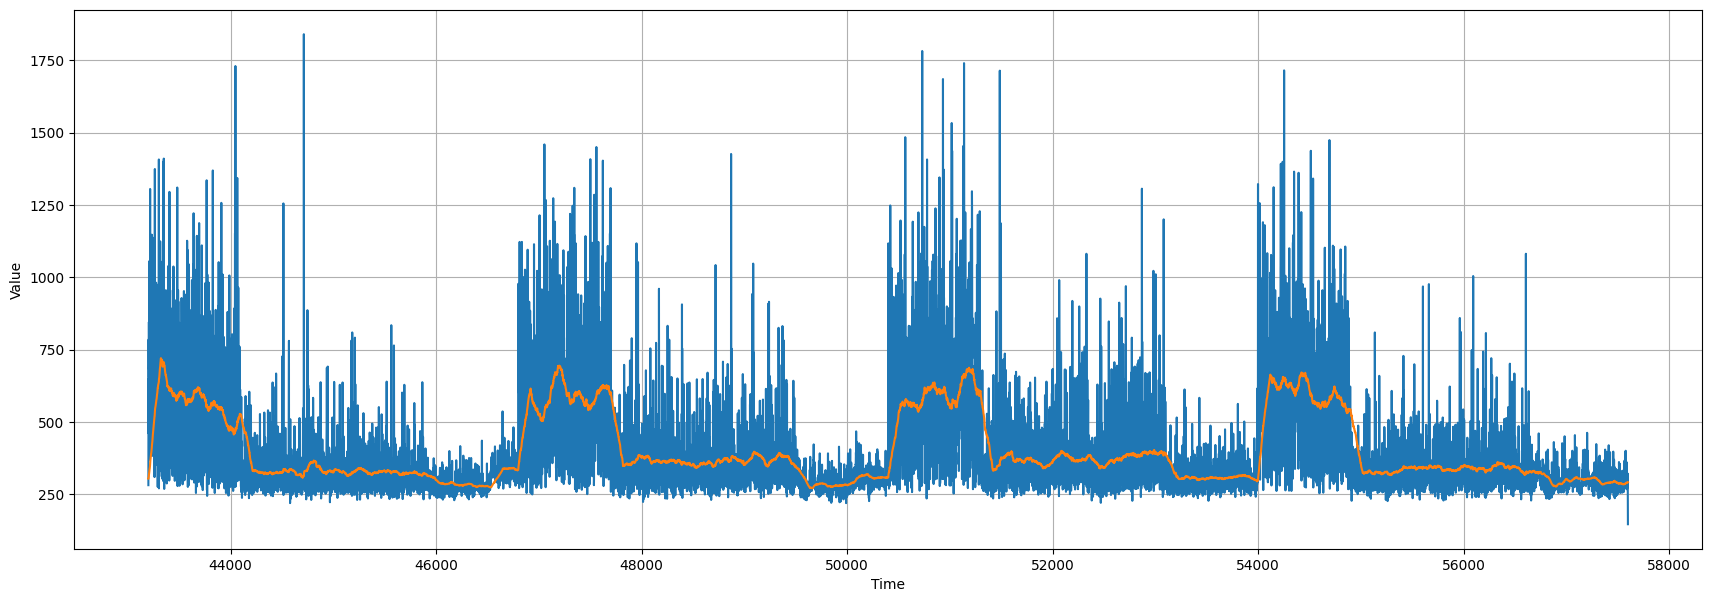

In [ ]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(latencia, 120)[split_time - 120:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mse(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mae(x_valid, moving_avg).numpy())

19867.94592346161
87.98183622685185


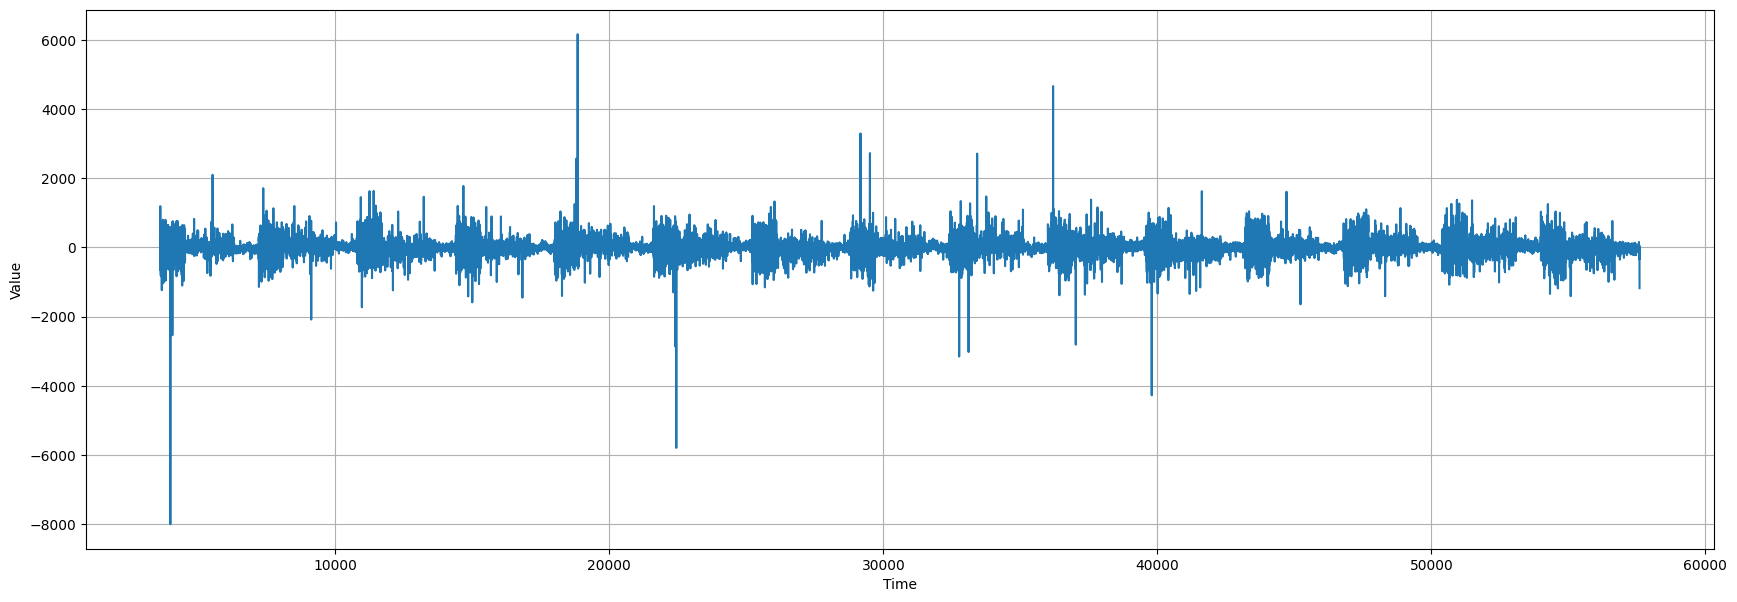

In [ ]:
# Subtract the values at t-365 from original series
diff_series = ((latencia[3600:].reset_index(drop=True) - latencia[:-3600]).reset_index(drop=True))
# Truncate the first 365 time steps
diff_time = time[3600:]

# Plot the results
plot_series(diff_time, diff_series)

Tamanho de diff_moving_avg antes do corte: 53880
Tamanho de diff_series após o corte: 14400
Tamanho de diff_moving_avg após o corte: 14400


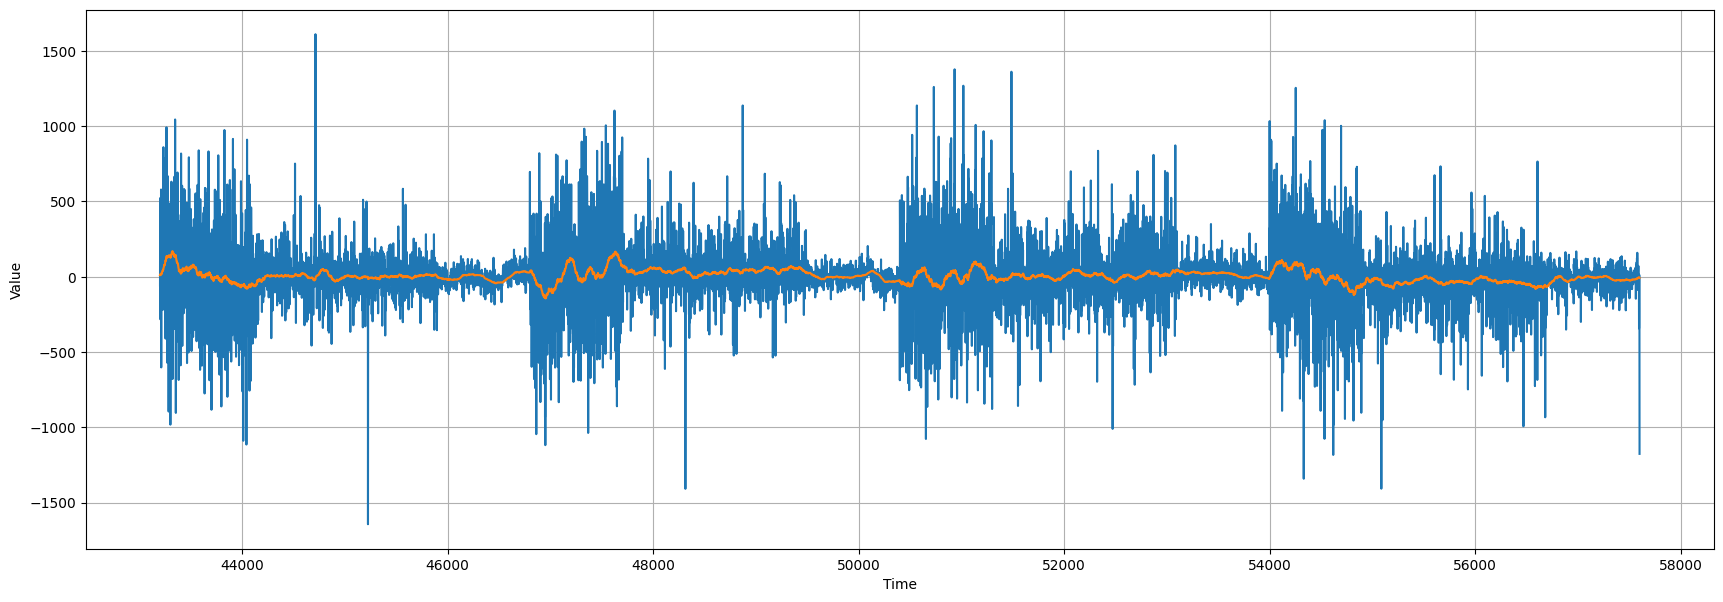

In [ ]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 120)

# Verifique o tamanho de diff_moving_avg antes do corte
print(f"Tamanho de diff_moving_avg antes do corte: {len(diff_moving_avg)}")

# Slice the prediction points that corresponds to the validation set time steps
# Verifique o tamanho de split_time e 14400 para garantir que o corte está correto
diff_moving_avg = diff_moving_avg[split_time - 3600 - 120:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - 3600:]

# Verifique os tamanhos das séries antes de plotar
print(f"Tamanho de diff_series após o corte: {len(diff_series)}")
print(f"Tamanho de diff_moving_avg após o corte: {len(diff_moving_avg)}")

# Plot the results, garantindo que os tamanhos sejam iguais
if len(diff_series) == len(diff_moving_avg):
    plot_series(time_valid, (diff_series, diff_moving_avg))
else:
    print("Erro: Tamanhos desalinhados entre as séries.")

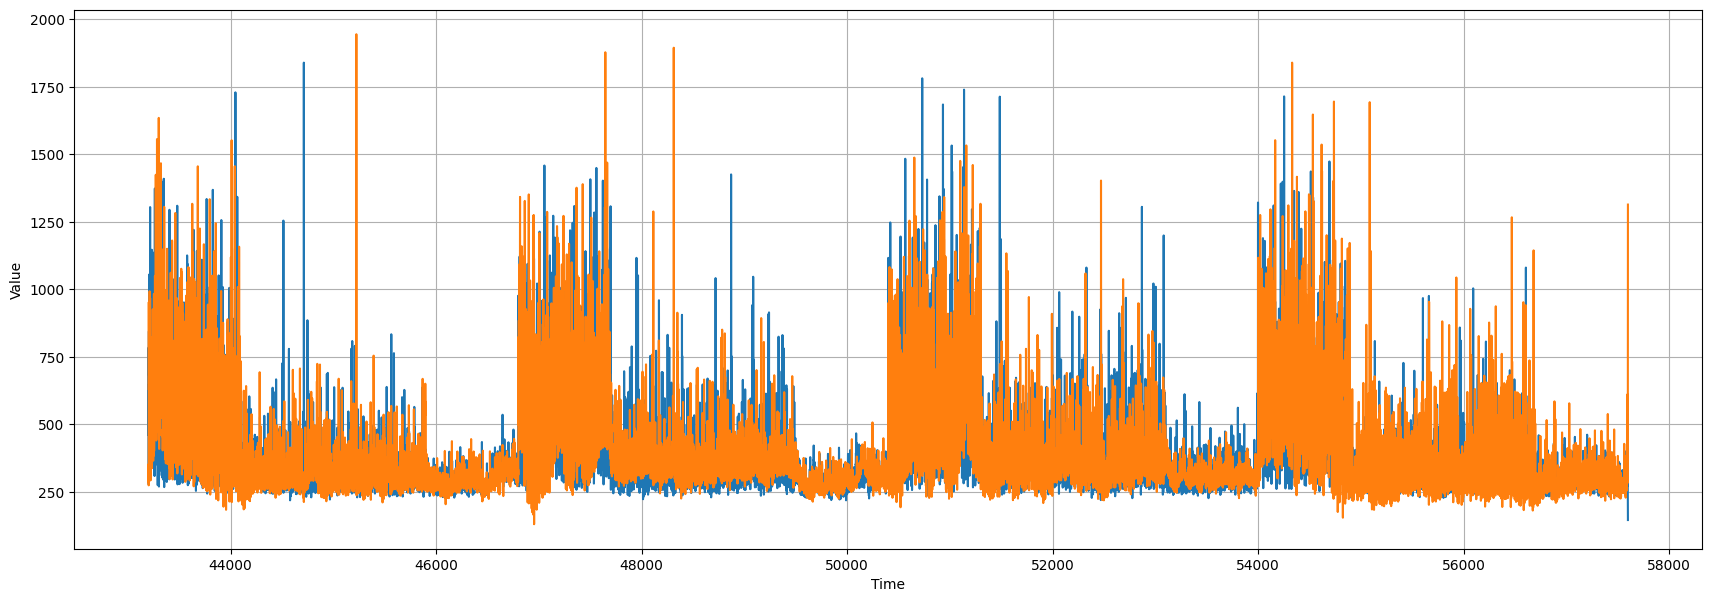

In [ ]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = latencia[split_time - 3600:-3600] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [ ]:
print(tf.keras.metrics.mse(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mae(x_valid, diff_moving_avg_plus_past).numpy())

36211.67477792728
117.82700405092594


Tamanho de smooth_past: 14400
Tamanho de diff_moving_avg: 14400


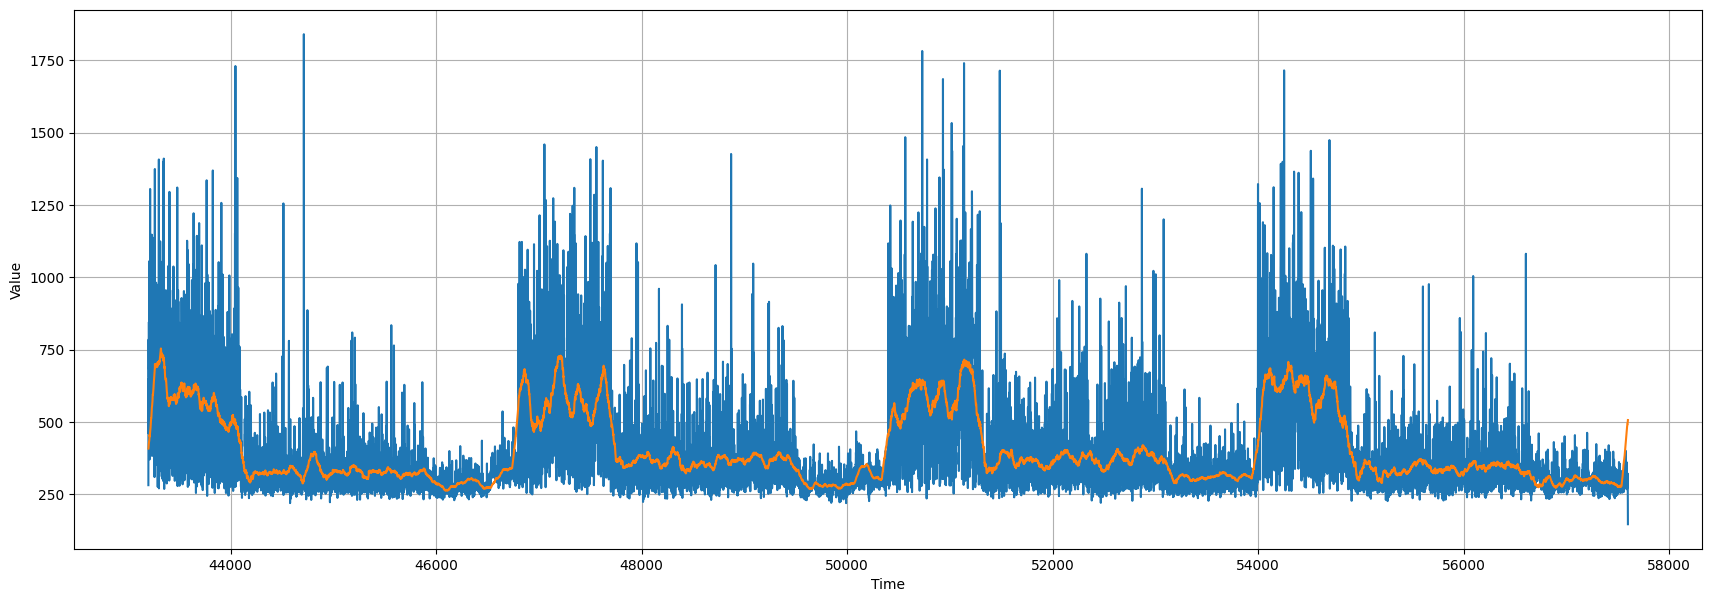

In [ ]:
# Gerar a média móvel suavizada da série original
smooth_past = moving_average_forecast(latencia[split_time - 3660:-3539], 121)

# Ajustar o tamanho de diff_moving_avg para corresponder ao de smooth_past
diff_moving_avg = diff_moving_avg[-len(smooth_past):]

# Agora somar as duas séries, pois agora têm o mesmo tamanho
diff_moving_avg_plus_smooth_past = smooth_past + diff_moving_avg

# Verifique o tamanho das séries antes de plotar
print(f"Tamanho de smooth_past: {len(smooth_past)}")
print(f"Tamanho de diff_moving_avg: {len(diff_moving_avg)}")

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mse(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mae(x_valid, diff_moving_avg_plus_smooth_past).numpy())

18902.55804117236
86.41425003347874


### Windows Size: 60 seconds (1 minute)

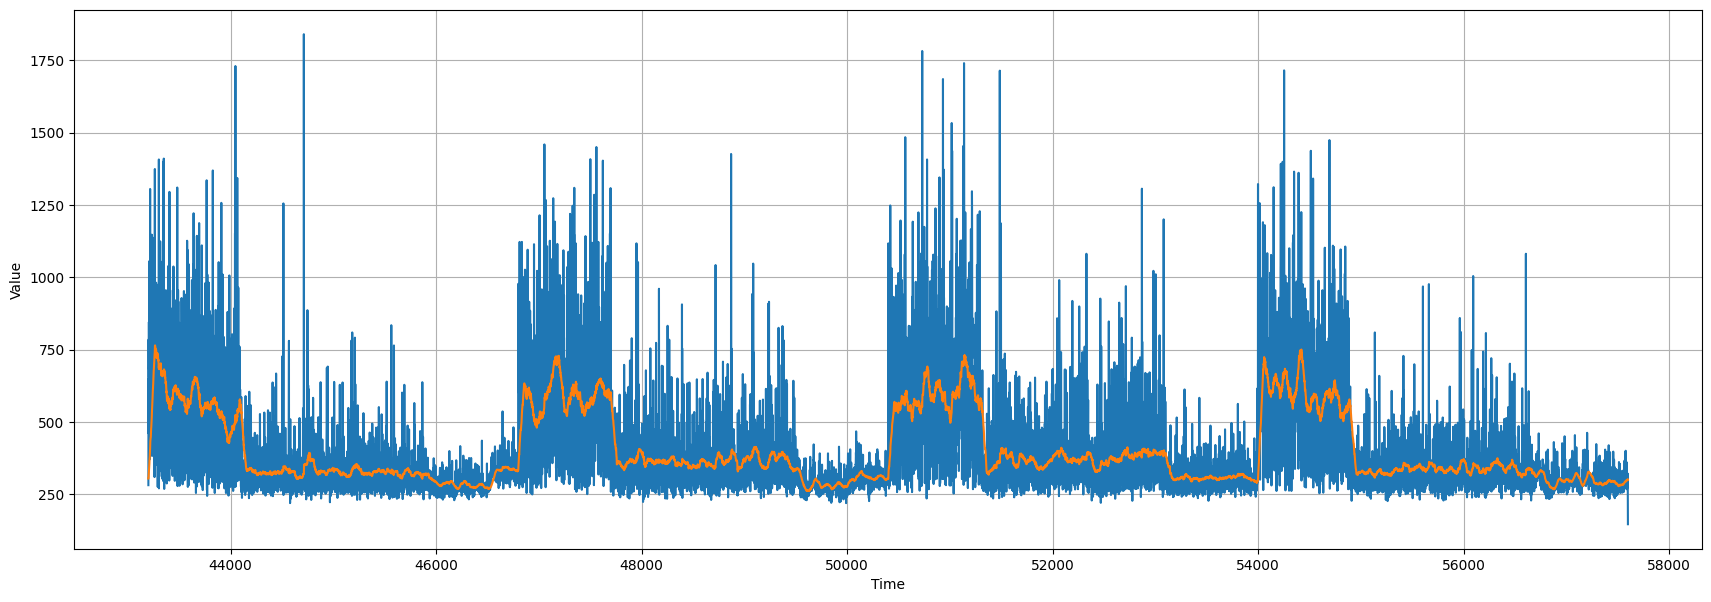

In [ ]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(latencia, 60)[split_time - 60:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mse(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mae(x_valid, moving_avg).numpy())

18958.464673090275
85.59436689814815


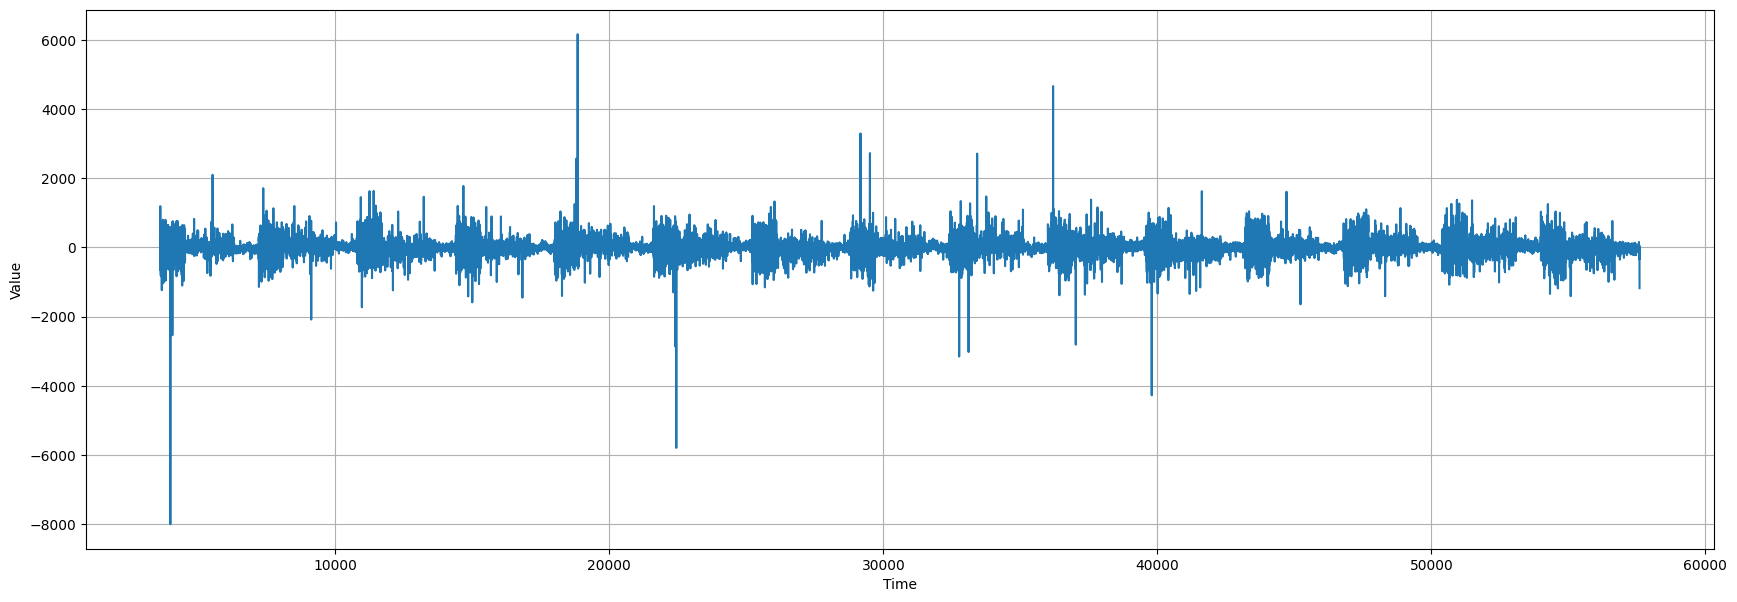

In [ ]:
# Subtract the values at t-365 from original series
diff_series = ((latencia[3600:].reset_index(drop=True) - latencia[:-3600]).reset_index(drop=True))
# Truncate the first 365 time steps
diff_time = time[3600:]

# Plot the results
plot_series(diff_time, diff_series)

Tamanho de diff_moving_avg antes do corte: 53940
Tamanho de diff_series após o corte: 14400
Tamanho de diff_moving_avg após o corte: 14400


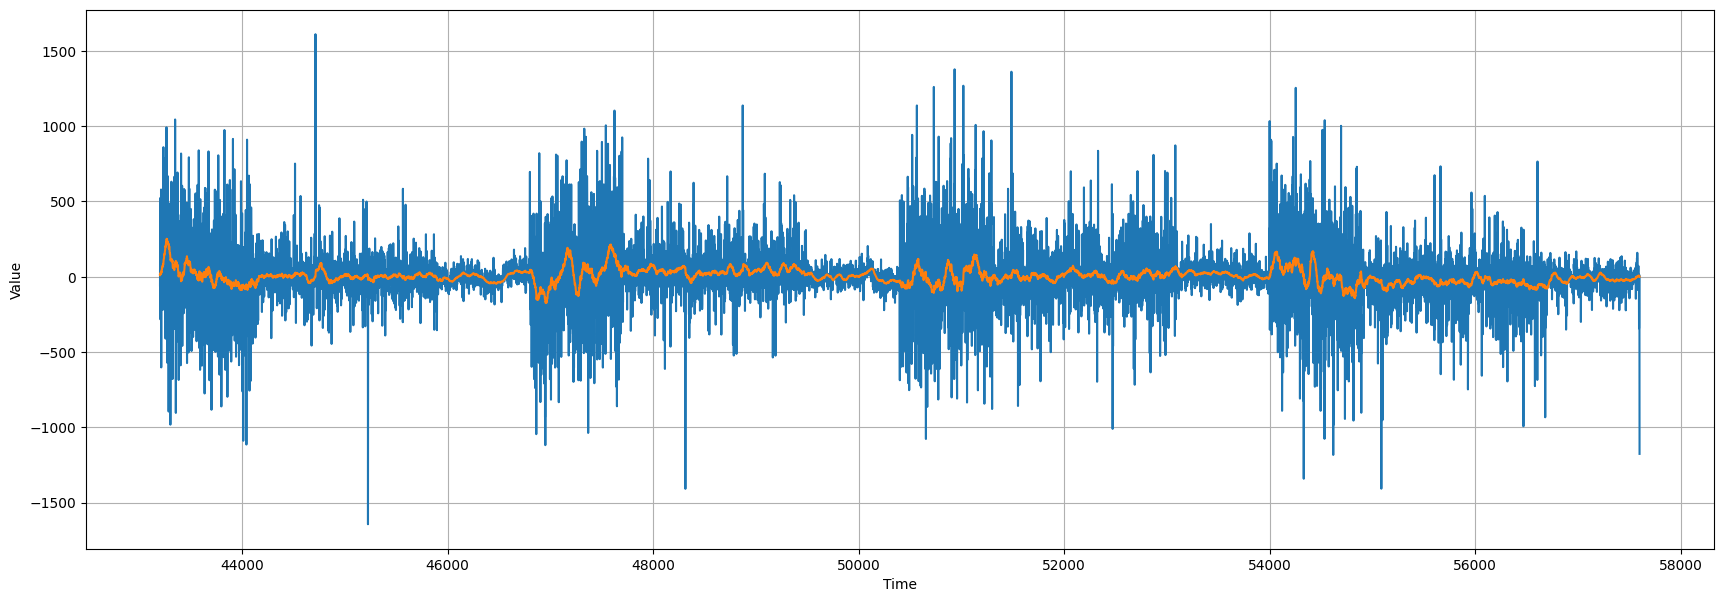

In [ ]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 60)

# Verifique o tamanho de diff_moving_avg antes do corte
print(f"Tamanho de diff_moving_avg antes do corte: {len(diff_moving_avg)}")

# Slice the prediction points that corresponds to the validation set time steps
# Verifique o tamanho de split_time e 14400 para garantir que o corte está correto
diff_moving_avg = diff_moving_avg[split_time - 3600 - 60:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - 3600:]

# Verifique os tamanhos das séries antes de plotar
print(f"Tamanho de diff_series após o corte: {len(diff_series)}")
print(f"Tamanho de diff_moving_avg após o corte: {len(diff_moving_avg)}")

# Plot the results, garantindo que os tamanhos sejam iguais
if len(diff_series) == len(diff_moving_avg):
    plot_series(time_valid, (diff_series, diff_moving_avg))
else:
    print("Erro: Tamanhos desalinhados entre as séries.")

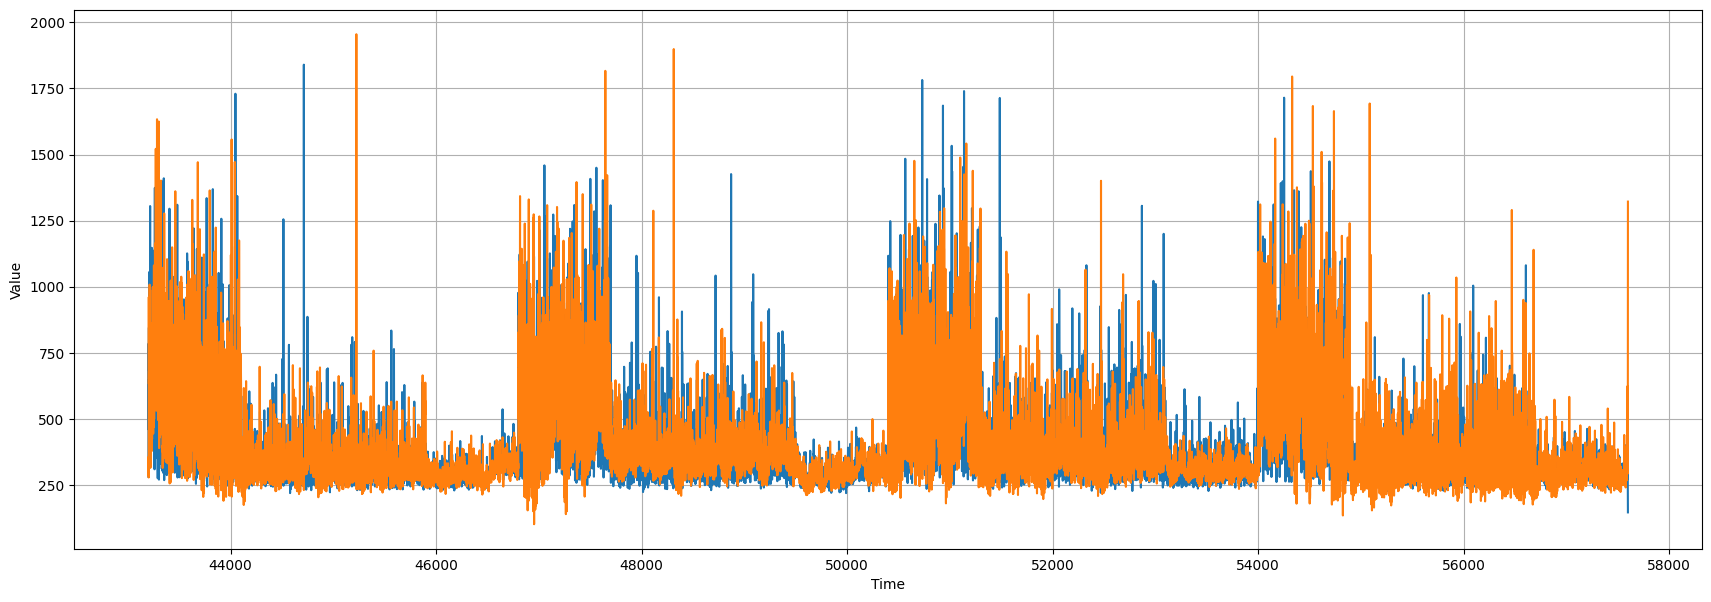

In [ ]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = latencia[split_time - 3600:-3600] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [ ]:
print(tf.keras.metrics.mse(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mae(x_valid, diff_moving_avg_plus_past).numpy())

36162.49801412036
118.08645601851853


Tamanho de smooth_past: 14400
Tamanho de diff_moving_avg: 14400


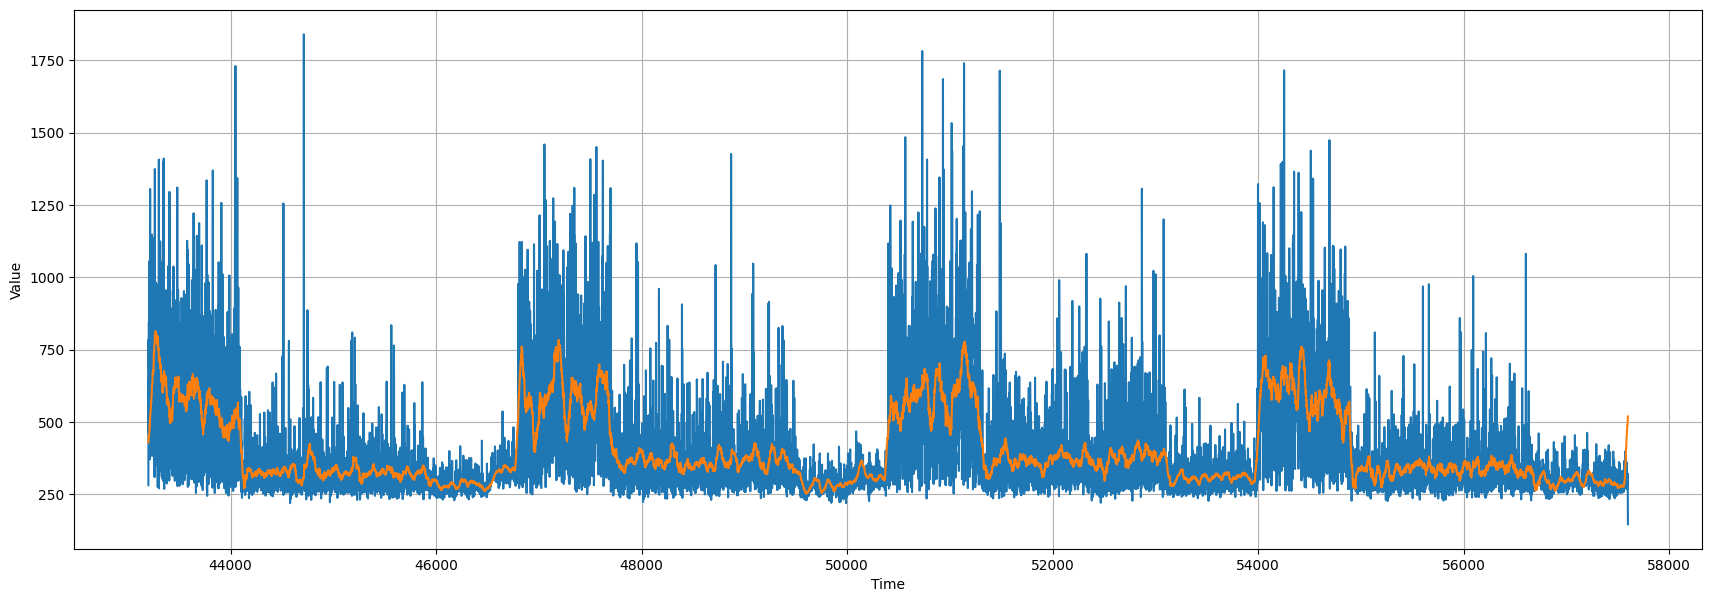

In [ ]:
# Gerar a média móvel suavizada da série original
smooth_past = moving_average_forecast(latencia[split_time - 3630:-3569], 61)

# Ajustar o tamanho de diff_moving_avg para corresponder ao de smooth_past
diff_moving_avg = diff_moving_avg[-len(smooth_past):]

# Agora somar as duas séries, pois agora têm o mesmo tamanho
diff_moving_avg_plus_smooth_past = smooth_past + diff_moving_avg

# Verifique o tamanho das séries antes de plotar
print(f"Tamanho de smooth_past: {len(smooth_past)}")
print(f"Tamanho de diff_moving_avg: {len(diff_moving_avg)}")

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mse(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mae(x_valid, diff_moving_avg_plus_smooth_past).numpy())

18763.89137818208
85.67019896023072


## Deep Learning Aproaches

In [ ]:
# def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
#     """Generates dataset windows

#     Args:
#       series (array of float) - contains the values of the time series
#       window_size (int) - the number of time steps to include in the feature
#       batch_size (int) - the batch size
#       shuffle_buffer(int) - buffer size to use for the shuffle method

#     Returns:
#       dataset (TF Dataset) - TF Dataset containing time windows
#     """

#     # Generate a TF Dataset from the series values
#     dataset = tf.data.Dataset.from_tensor_slices(series)

#     # Window the data but only take those with the specified size
#     dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

#     # Flatten the windows by putting its elements in a single batch
#     dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

#     # Create tuples with features and labels
#     dataset = dataset.map(lambda window: (window[:-1], window[-1]))

#     # Shuffle the windows
#     dataset = dataset.shuffle(shuffle_buffer)

#     # Create batches of windows
#     dataset = dataset.batch(batch_size)

#     # Optimize the dataset for training
#     dataset = dataset.cache().prefetch(1)

#     return dataset

In [ ]:
mean = latencia.mean()
std = latencia.std()
normalized = (latencia - mean) / std

In [ ]:
# Define the split time
test_hours = 1
split_time = (time.shape[0] - test_hours * 3600)
print(split_time)

# Get the train set
time_train = time[:split_time]
x_train = normalized[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = normalized[split_time:]

54000


In [ ]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
# Generate the dataset windows
# dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows"""

    # Calcule o número de janelas (tamanho total do dataset)
    num_samples = len(series) - window_size  # Exclui as amostras fora da janela
    num_batches = num_samples // batch_size

    # Agora, crie o dataset como antes
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size)
    dataset = dataset.cache().prefetch(1)

    # Retorne o dataset e o número de batches (steps_per_epoch)
    return dataset, num_batches

# Exemplo de uso:
dataset, steps_per_epoch = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(f"Steps per epoch: {steps_per_epoch}")

Steps per epoch: 1686


In [ ]:
# Print properties of a single batch
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20)
shape of second element: (32,)


In [ ]:
# Build the single layer neural network
l0 = tf.keras.layers.Dense(1)
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size,)),
    l0
])

# Print the initial layer weights
print("Layer weights: \n {} \n".format(l0.get_weights()))

# Print the model summary
model.summary()

Layer weights: 
 [array([[ 0.03481382],
       [-0.39427912],
       [ 0.17320997],
       [-0.20506245],
       [ 0.34906185],
       [ 0.23970944],
       [-0.42847258],
       [-0.31990865],
       [-0.23633128],
       [ 0.3055032 ],
       [-0.00935805],
       [-0.35170954],
       [ 0.14953983],
       [-0.25415313],
       [-0.01808733],
       [ 0.4145323 ],
       [-0.05168587],
       [-0.24301448],
       [-0.40717605],
       [ 0.01886392]], dtype=float32), array([0.], dtype=float32)] 



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set the training parameters
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [ ]:
# Train the model
model.fit(dataset, epochs=100, steps_per_epoch=steps_per_epoch)

Epoch 1/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.6199
Epoch 2/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - loss: 2.6931   
Epoch 3/100
 126/1686 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.6727

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1686/1686 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.8269
Epoch 4/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step - loss: 2.1282 
Epoch 5/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3603
Epoch 6/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - loss: 1.7470
Epoch 7/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.0801
Epoch 8/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - loss: 1.4825
Epoch 9/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.9063
Epoch 10/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - loss: 1.2937
Epoch 11/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7935
Epoch 12/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - loss: 1.1549
Epoch 13/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.7158
Epoch 14/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - loss: 1.0497
Epoch 15/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.6587
Epoch 16/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - loss: 0.9678
Epoch 17/100
1686/1686 ━

In [ ]:
# Print the layer weights
print("Layer weights {}".format(l0.get_weights()))

Layer weights [array([[ 0.09612627],
       [-0.08770821],
       [ 0.13500974],
       [-0.03562784],
       [ 0.1712667 ],
       [ 0.14297774],
       [-0.09990064],
       [-0.04224863],
       [-0.03166446],
       [ 0.17867129],
       [ 0.06012042],
       [-0.07373948],
       [ 0.1485635 ],
       [-0.03818369],
       [ 0.06239205],
       [ 0.20812272],
       [ 0.04024662],
       [-0.01197137],
       [-0.06227496],
       [ 0.15465079]], dtype=float32), array([-0.00082127], dtype=float32)]


In [ ]:
import numpy as np

# Convert the Pandas Series to a NumPy array
series = normalized.values

# Shape of the first 20 data points slice
print(f'shape of series[0:20]: {series[0:20].shape}')

# Shape after adding a batch dimension
print(f'shape of series[0:20][np.newaxis]: {series[0:20][np.newaxis].shape}')

# Shape after adding a batch dimension (alternate way)
print(f'shape of series[0:20][np.newaxis]: {np.expand_dims(series[0:20], axis=0).shape}')

# Sample model prediction
print(f'model prediction: {model.predict(series[0:20][np.newaxis])}')


shape of series[0:20]: (20,)
shape of series[0:20][np.newaxis]: (1, 20)
shape of series[0:20][np.newaxis]: (1, 20)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
model prediction: [[1.027626]]


In [ ]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis], verbose=0))

# Slice the points that are aligned with the validation set
forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

length of the forecast list: 3600
shape of the validation set: (3600,)


shape after converting to numpy array: (3600, 1, 1)
shape after squeezing: (3600,)


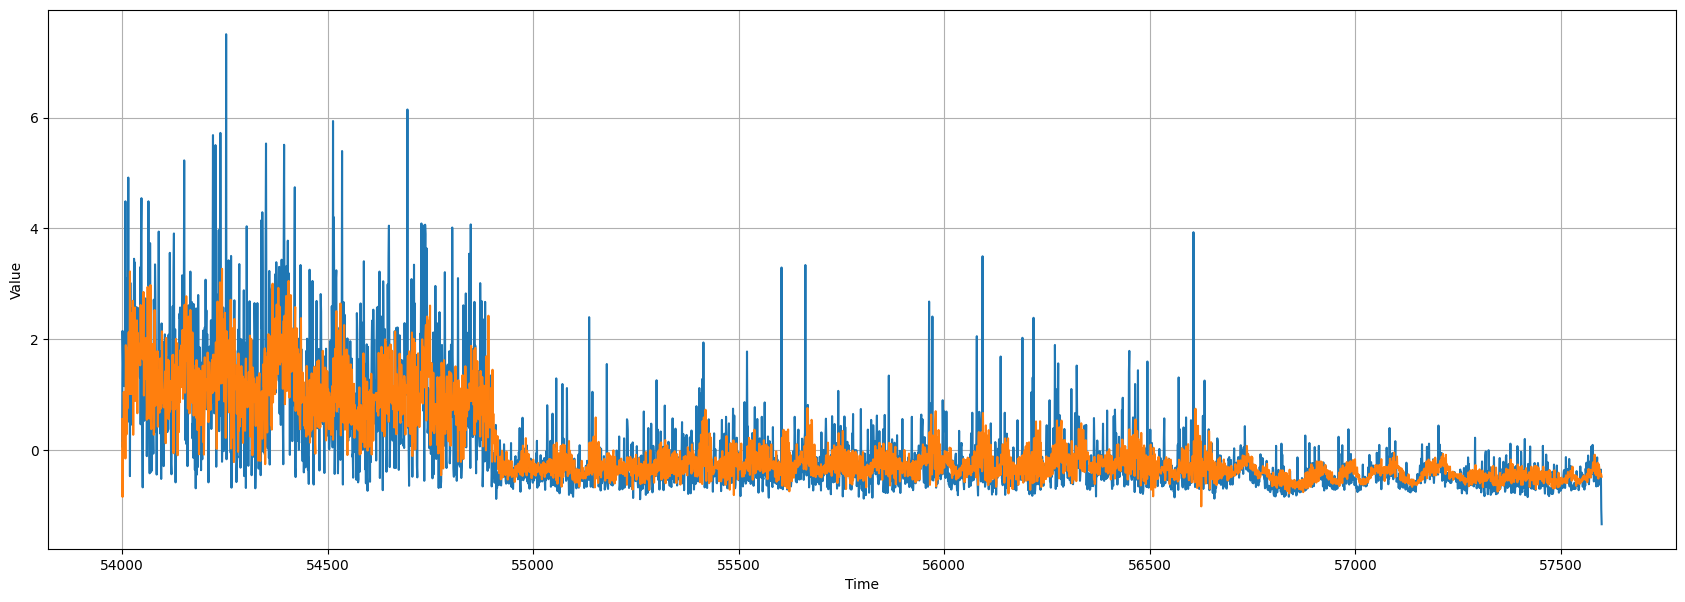

In [ ]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mse(x_valid, results).numpy())
print(tf.keras.metrics.mae(x_valid, results).numpy())

0.5739922
0.47173074
